# Grupo 1

Guilherme Sousa - pg51188

Karyna Lysenko - pg 51191 

Rodrigo Esperança-  

## Dataset Description: 

Mutagenicity means the ability of a drug to induce genetic alterations. Drugs that can cause damage to the DNA can result in cell death or other severe adverse effects. Nowadays, the most widely used assay for testing the mutagenicity of compounds is the Ames experiment which was invented by a professor named Ames. 

The Ames test is a short-term bacterial reverse mutation assay detecting a large number of compounds which can induce genetic damage and frameshift mutations. This test involves exposing bacteria to the chemical being tested and assessing the rate of genetic mutations compared to a control group that has not been exposed to the substance. If the rate of mutations in the exposed bacteria is significantly higher than in the control group, this suggests that the chemical is mutagenic and may pose a risk to human health.

The dataset is aggregated from four papers.


## Task Description: 

Binary classification. Given a drug SMILES string (representation of a molecule using an ASCII string that represents the chemical structure of the molecule), predict whether it is mutagenic (1) or not mutagenic (0).

## Dataset Statistics: 

7,273 drugs.

o que podemos ver a partir deste tipo de data set8algo a elimiar depois:

Identificação de compostos mutagênicos: Um conjunto de dados Ames pode ser usado para identificar quais compostos químicos têm a capacidade de causar mutações genéticas nas bactérias Salmonella typhimurium.

Avaliação da segurança química: Com base nos resultados dos testes de mutagenicidade, é possível avaliar a segurança de compostos químicos para o uso humano e ambiental. Se um composto é considerado altamente mutagênico, pode ser necessário regulamentar ou proibir o uso desse composto.

Desenvolvimento de modelos de QSAR: Os dados de um conjunto de dados Ames podem ser usados para desenvolver modelos de Relação Quantitativa entre Estrutura e Atividade (QSAR) que prevejam a mutagenicidade de novos compostos com base em sua estrutura química.

Avaliação de métodos de análise de dados: Os dados de um conjunto de dados Ames também podem ser usados para avaliar a eficácia de diferentes métodos de análise de dados na previsão da mutagenicidade de novos compostos.

In [1]:
#Librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler





# Importar os dados e sua respetiva visualização

In [2]:
df_ames = pd.read_csv('ames.csv')
print(df_ames)

            ids                                             smiles  Y
0        Drug 0  O=[N+]([O-])c1ccc2ccc3ccc([N+](=O)[O-])c4c5ccc...  1
1        Drug 1       O=[N+]([O-])c1c2c(c3ccc4cccc5ccc1c3c45)CCCC2  1
2        Drug 2  O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...  0
3        Drug 3                          [N-]=[N+]=CC(=O)NCC(=O)NN  1
4        Drug 4                          [N-]=[N+]=C1C=NC(=O)NC1=O  1
...         ...                                                ... ..
7268  Drug 7587                                   CCCCCCCCCCCCOCCO  0
7269  Drug 7588                             CC(CCc1ccccc1)c1ccccc1  0
7270  Drug 7593                              CCOP(=S)(CC)Sc1ccccc1  0
7271  Drug 7598                        C=C(C)C1CC=C(C)C(OC(C)=O)C1  0
7272  Drug 7602  CC/N=c1\cc2oc3cc(NCC)c(C)cc3c(-c3ccccc3C(=O)OC...  0

[7273 rows x 3 columns]


In [3]:
df_features= pd.read_csv('ames_features.csv')
print(df_features)

      MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
0          11.663401       -0.396099          11.663401           0.008895   
1          11.824743       -0.170602          11.824743           0.170602   
2          14.431072       -0.378575          14.431072           0.128988   
3          10.422196       -0.670278          10.422196           0.248657   
4          10.521759       -0.752407          10.521759           0.278148   
...              ...             ...                ...                ...   
7268        8.502606        0.150556           8.502606           0.150556   
7269        2.303843        0.640191           2.303843           0.640191   
7270        5.671445       -1.672137           5.671445           0.713245   
7271       10.862176       -0.203597          10.862176           0.038935   
7272       12.621537       -0.362955          12.621537           0.362955   

           qed    MolWt  HeavyAtomMolWt  ExactMolWt  NumValence

# Merge dos dataframes

In [4]:
#juntar os dataframes para ser mais fácil trabalhar
df_global= pd.concat([df_ames, df_features], axis=1)
print(df_global)


            ids                                             smiles  Y  \
0        Drug 0  O=[N+]([O-])c1ccc2ccc3ccc([N+](=O)[O-])c4c5ccc...  1   
1        Drug 1       O=[N+]([O-])c1c2c(c3ccc4cccc5ccc1c3c45)CCCC2  1   
2        Drug 2  O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...  0   
3        Drug 3                          [N-]=[N+]=CC(=O)NCC(=O)NN  1   
4        Drug 4                          [N-]=[N+]=C1C=NC(=O)NC1=O  1   
...         ...                                                ... ..   
7268  Drug 7587                                   CCCCCCCCCCCCOCCO  0   
7269  Drug 7588                             CC(CCc1ccccc1)c1ccccc1  0   
7270  Drug 7593                              CCOP(=S)(CC)Sc1ccccc1  0   
7271  Drug 7598                        C=C(C)C1CC=C(C)C(OC(C)=O)C1  0   
7272  Drug 7602  CC/N=c1\cc2oc3cc(NCC)c(C)cc3c(-c3ccccc3C(=O)OC...  0   

      MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
0          11.663401       -0.396099         

# Info sobre os dados e filtragem pré-precessamento

Os dados a ser tratados e analisados, englobam um conjunto de drogas identificados com um ID único, cuja composição química é representada numa string SMILES, sendo que cada droga tem associado diversos parametros. Estes parametros numéricos (exemplo:qed,MolWT,FpDensityMorgan1) descrevem as propriedades das respetivas drogas, o que pode auxiliar numa determinada interpretação biológica. Existe também parâmetros binários (0 ou 1) que indicam a ausência ou presença de algo, respetivamente. Existe uma propriedade indicada com o nome "Y" que indica se uma determinada droga tem um determinada capacidade mutagénica ou não. Se uma determinada droga tiver associada a um Y de valor 1, significa que a mesma pode causar mutações no material genético , como o DNA. A presença de mutações pode levar a uma variedade de efeitos adversos, incluindo o desenvolvimento de doenças genéticas, cancro e outras condições de saúde. Portanto, a capacidade de prever se um composto químico é mutagénico é importante para a segurança alimentar, farmacêutica e ambiental.

In [5]:
#NAN- valores ausentes
tem_nulos = df_global.isnull().sum(axis=1) > 0
print(df_global[tem_nulos])

#não existem valores NaN

Empty DataFrame
Columns: [ids, smiles, Y, MaxEStateIndex, MinEStateIndex, MaxAbsEStateIndex, MinAbsEStateIndex, qed, MolWt, HeavyAtomMolWt, ExactMolWt, NumValenceElectrons, NumRadicalElectrons, MaxPartialCharge, MinPartialCharge, MaxAbsPartialCharge, MinAbsPartialCharge, FpDensityMorgan1, FpDensityMorgan2, FpDensityMorgan3, BCUT2D_MWHI, BCUT2D_MWLOW, BCUT2D_CHGHI, BCUT2D_CHGLO, BCUT2D_LOGPHI, BCUT2D_LOGPLOW, BCUT2D_MRHI, BCUT2D_MRLOW, BalabanJ, BertzCT, Chi0, Chi0n, Chi0v, Chi1, Chi1n, Chi1v, Chi2n, Chi2v, Chi3n, Chi3v, Chi4n, Chi4v, HallKierAlpha, Ipc, Kappa1, Kappa2, Kappa3, LabuteASA, PEOE_VSA1, PEOE_VSA10, PEOE_VSA11, PEOE_VSA12, PEOE_VSA13, PEOE_VSA14, PEOE_VSA2, PEOE_VSA3, PEOE_VSA4, PEOE_VSA5, PEOE_VSA6, PEOE_VSA7, PEOE_VSA8, PEOE_VSA9, SMR_VSA1, SMR_VSA10, SMR_VSA2, SMR_VSA3, SMR_VSA4, SMR_VSA5, SMR_VSA6, SMR_VSA7, SMR_VSA8, SMR_VSA9, SlogP_VSA1, SlogP_VSA10, SlogP_VSA11, SlogP_VSA12, SlogP_VSA2, SlogP_VSA3, SlogP_VSA4, SlogP_VSA5, SlogP_VSA6, SlogP_VSA7, SlogP_VSA8, SlogP_VSA9

In [6]:
#remoção valores duplicados
tem_duplicados = df_global.duplicated(subset='ids', keep=False)
print(df_global[tem_duplicados])
#não existem  ids duplicados

Empty DataFrame
Columns: [ids, smiles, Y, MaxEStateIndex, MinEStateIndex, MaxAbsEStateIndex, MinAbsEStateIndex, qed, MolWt, HeavyAtomMolWt, ExactMolWt, NumValenceElectrons, NumRadicalElectrons, MaxPartialCharge, MinPartialCharge, MaxAbsPartialCharge, MinAbsPartialCharge, FpDensityMorgan1, FpDensityMorgan2, FpDensityMorgan3, BCUT2D_MWHI, BCUT2D_MWLOW, BCUT2D_CHGHI, BCUT2D_CHGLO, BCUT2D_LOGPHI, BCUT2D_LOGPLOW, BCUT2D_MRHI, BCUT2D_MRLOW, BalabanJ, BertzCT, Chi0, Chi0n, Chi0v, Chi1, Chi1n, Chi1v, Chi2n, Chi2v, Chi3n, Chi3v, Chi4n, Chi4v, HallKierAlpha, Ipc, Kappa1, Kappa2, Kappa3, LabuteASA, PEOE_VSA1, PEOE_VSA10, PEOE_VSA11, PEOE_VSA12, PEOE_VSA13, PEOE_VSA14, PEOE_VSA2, PEOE_VSA3, PEOE_VSA4, PEOE_VSA5, PEOE_VSA6, PEOE_VSA7, PEOE_VSA8, PEOE_VSA9, SMR_VSA1, SMR_VSA10, SMR_VSA2, SMR_VSA3, SMR_VSA4, SMR_VSA5, SMR_VSA6, SMR_VSA7, SMR_VSA8, SMR_VSA9, SlogP_VSA1, SlogP_VSA10, SlogP_VSA11, SlogP_VSA12, SlogP_VSA2, SlogP_VSA3, SlogP_VSA4, SlogP_VSA5, SlogP_VSA6, SlogP_VSA7, SlogP_VSA8, SlogP_VSA9

In [7]:
#Dimensões
print(df_global.shape)

#7273 linhas que representam o numero de drogas analisadas.
#211 colunas que sao os parametros caracteristicos de cada uma destas drogas.

(7273, 211)


In [8]:
#forma de visualizar as primeiras 5 linhas no nosso dataframe, ou seja as primeiras 5 drogas e respetivos parametros.
print(df_global.head(5))

      ids                                             smiles  Y  \
0  Drug 0  O=[N+]([O-])c1ccc2ccc3ccc([N+](=O)[O-])c4c5ccc...  1   
1  Drug 1       O=[N+]([O-])c1c2c(c3ccc4cccc5ccc1c3c45)CCCC2  1   
2  Drug 2  O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...  0   
3  Drug 3                          [N-]=[N+]=CC(=O)NCC(=O)NN  1   
4  Drug 4                          [N-]=[N+]=C1C=NC(=O)NC1=O  1   

   MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
0       11.663401       -0.396099          11.663401           0.008895   
1       11.824743       -0.170602          11.824743           0.170602   
2       14.431072       -0.378575          14.431072           0.128988   
3       10.422196       -0.670278          10.422196           0.248657   
4       10.521759       -0.752407          10.521759           0.278148   

        qed    MolWt  HeavyAtomMolWt  ...  fr_sulfide  fr_sulfonamd  \
0  0.181963  342.310         332.230  ...         0.0           0.0   
1  0

In [9]:
#forma de visualizar as últimas 5 linhas no nosso dataframe, ou seja as últimas 5 drogas e respetivos parametros.
print(df_global.tail(5))

            ids                                             smiles  Y  \
7268  Drug 7587                                   CCCCCCCCCCCCOCCO  0   
7269  Drug 7588                             CC(CCc1ccccc1)c1ccccc1  0   
7270  Drug 7593                              CCOP(=S)(CC)Sc1ccccc1  0   
7271  Drug 7598                        C=C(C)C1CC=C(C)C(OC(C)=O)C1  0   
7272  Drug 7602  CC/N=c1\cc2oc3cc(NCC)c(C)cc3c(-c3ccccc3C(=O)OC...  0   

      MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
7268        8.502606        0.150556           8.502606           0.150556   
7269        2.303843        0.640191           2.303843           0.640191   
7270        5.671445       -1.672137           5.671445           0.713245   
7271       10.862176       -0.203597          10.862176           0.038935   
7272       12.621537       -0.362955          12.621537           0.362955   

           qed    MolWt  HeavyAtomMolWt  ...  fr_sulfide  fr_sulfonamd  \
7268  0.485970  23

In [10]:
#ver types de dados de cada coluna
print(df_global.dtypes)

ids                  object
smiles               object
Y                     int64
MaxEStateIndex      float64
MinEStateIndex      float64
                     ...   
fr_thiazole         float64
fr_thiocyan         float64
fr_thiophene        float64
fr_unbrch_alkane    float64
fr_urea             float64
Length: 211, dtype: object


In [11]:
#nome de todas as colunas
print(df_global.columns.tolist())

['ids', 'smiles', 'Y', 'MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10

Através de uma simples análise dos dados do df_global é possivel verificar que não existe valores NaN , nem ids duplicados. O dataset possui 7273 linhas que corresponde às drogas analisadass e 211 colunas que retratam parametros caracteristicos das mesmas e que, posteriormente, serão importantes para retirar conclusões que permitam asssociar cada uma destas colunas à capacidade mutagénica de determinada droga.

Salientar que de todas as colunas aquela que terá maior preponderância na nossa análise e que será sempre tida em consideração é a coluna Y . Esta coluna é binária ou 0 representa que uma determinada droga não tem capacidade mutagénica e o valor 1 representa capacidade mutagénica.

Assim, decidimos ordenar o nosso df_global por ordem ascendente tendo como base a coluna em questão, sendo os primeiros valores associados a Y=0 e os últimos valores a um y=1. Fazendo só um aparte que a segunda coluna referência neste processo de ordenação foi a coluna ids.

In [12]:
#ordenar primeiro pelos Y, ascending, e depois pelos ids
df_global = df_global.sort_values(by=['Y', 'ids'])
#df_global.head()
#df_global.tail()

# Análise descritiva dos dados

In [13]:
#info geral do nosso merge dataframe
df_global.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 7273 entries, 10 to 998
Columns: 211 entries, ids to fr_urea
dtypes: float64(208), int64(1), object(2)
memory usage: 11.8+ MB


In [14]:
df_global.describe()

,Y,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,7273.000000,7273.000000,7273.000000,7273.000000,7273.000000,7273.000000,7273.000000,7273.000000,7273.000000,7273.000000,...,7273.000000,7273.000000,7273.000000,7273.000000,7273.000000,7273.000000,7273.000000,7273.00000,7273.000000,7273.000000
mean,0.546405,9.362443,-0.451765,9.362443,0.349721,0.510130,242.568881,229.065451,242.196954,88.108483,...,0.026674,0.011275,0.003162,0.003025,0.000412,0.012237,0.000550,0.00825,0.270727,0.017874
std,0.497876,3.029246,1.227820,3.029246,0.396510,0.167265,107.926752,102.707469,107.731070,39.772440,...,0.176611,0.111911,0.058548,0.054919,0.020307,0.114844,0.028719,0.09345,1.539449,0.138591
min,0.000000,1.500000,-9.055860,1.500000,0.000000,0.036666,41.053000,36.033000,41.026550,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,6.209384,-0.846972,6.209384,0.075424,0.396894,165.148000,156.100000,165.039000,60.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,10.384028,-0.355799,10.384028,0.211296,0.510491,230.270000,218.173000,230.069140,84.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,11.488809,0.353001,11.488809,0.510718,0.621552,296.319000,280.241000,296.060400,108.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,1.000000,17.286264,4.111111,17.286264,4.944445,0.935197,795.824000,766.923000,795.175400,314.000000,...,3.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.00000,29.000000,2.000000


In [15]:
df_global.apply(lambda x: str(x.min())+"---"+str (x.max()))

ids                                  Drug 0---Drug 999
smiles              Br/C=C/Br---c1scc2c1-c1cscc1C1OC21
Y                                                0---1
MaxEStateIndex                         1.5---17.286264
MinEStateIndex                     -9.05586---4.111111
                                   ...                
fr_thiazole                                  0.0---2.0
fr_thiocyan                                  0.0---2.0
fr_thiophene                                 0.0---2.0
fr_unbrch_alkane                            0.0---29.0
fr_urea                                      0.0---2.0
Length: 211, dtype: object

Os dados descritivos obtidos como a média, mediana, desvio padrão, entre outros, podem ser extremamente uteis na interpretação dos dados, podendo levar a conclusoes biológicas interessantes. Todavia, quando fazemos esta análise descritiva para todas as colunas, acaba por ser bastante complicado saber filtrar toda esta informação e, como tal, fica pouco provavel a formação de um eventual relacionamento entre colunas.

Assim, a estratégia empregue foi, tendo por base sempre a coluna Y, tentar relacionar as restantes colunas com esta sabendo  que é um processo muito extenso analisar todas as colunas e , por isso, focamos apenas nas colunas que segundo a literatura pensamos que nos iriam permitir nesta 1 fase retirar as melhores associações e conclusões.

Em primeiro lugar verificamos a distribuição da coluna y, ou seja, percebr das 7273 drogas analisadas quantas estavam ou não associadas a uma capacidade mutagénica. Desta forma, criamos 2 gráficos , um gráfico circurlar que nos permite ver esta distribuição em percentagem e um histograma que nos permite ter uma maior noção em termos de frequência.

1    3974
0    3299
Name: Y, dtype: int64


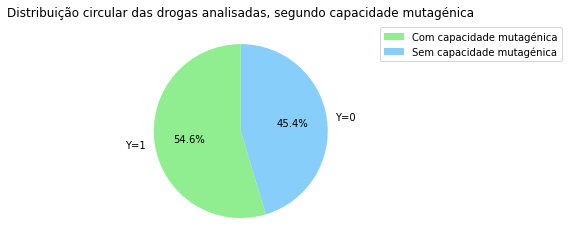

In [16]:
#gráfico circular para analisar a distribuição entre y 0 ou 1
frequence = df_global['Y'].value_counts()
print(frequence)
labels = ['Y=1', 'Y=0']
colors = ['lightgreen', 'lightskyblue']
plt.pie(frequence, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição circular das drogas analisadas, segundo capacidade mutagénica')
plt.legend(["Com capacidade mutagénica","Sem capacidade mutagénica"],bbox_to_anchor=(2, 1), loc='upper right', ncol=1)
plt.show()


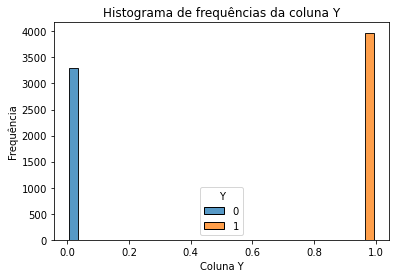

In [17]:
sns.histplot(data=df_global, x='Y', hue='Y', multiple='dodge', shrink=.8)
plt.xlabel('Coluna Y')
plt.ylabel('Frequência')
plt.title('Histograma de frequências da coluna Y')
plt.show()

Como era expectável amos os gráficos permitem retirar a mesma conclusão, ou , o df_global tem mais drogas associadas a uma capacidade mutagénica. Todavia a diferença não é assim tão elevada, o que é adequeado para estudos que serão realizados posteriormente.

Dando uma vista de olhos mais geral pelo df_global foi possível verificar que existem diversos "grupos" de colunas com o nome bastante semelhante. Face a isso, o que fizemos foi pesquisar na literatura uma possivel associação entre o que é avaliado em cada uma dessas colunas e a capcidade mutagénica de um composto. 

O que pretendiamos era, de certa forma, nesta etapa filtrar um pouco os dados, uma vez que, ainda tinhamos 211 colunas. Então a estratégia foi em primeiro lugar normalizar os dados comuns , ou seja os dados associados a cada "grupo" de colunas escolhido e a partir daí escolher as colunas que tinhas as médias mais elevadas tendo sempre em paralelo a coluna y =1 e y=0.


O primeiro "grupo" a ser analisado foi o "fr_" que representa a fração molar de compostos em cada molécula.  Segundo a literatura algumas moléculas químicas podem estar associadas à capacidade mutagênica de uma molécula. Por exemplo, certos grupos funcionais (como os grupos nitro) ou estruturas aromáticas (como anéis benzênicos) podem aumentar a capacidade mutagênica de uma molécula. Portanto, a presença de certas subestruturas químicas na coluna "fr_" pode ser um indicador de que uma molécula tem maior ou menor potencial para ser mutagénica.



In [18]:
# Selecionar  as colunas que começam com "fr_" com auxilio da regex
cols_fr = df_global.filter(regex='^fr_').columns

# Aplicando a normalização apenas nessas colunas, achamos necesário
scaler = StandardScaler()
df_global[cols_fr] = scaler.fit_transform(df_global[cols_fr])
df_global[cols_fr] 


,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
10,-0.231277,-0.353990,-0.338216,6.813532,-0.147601,3.208969,-0.191858,-0.305681,-0.276524,-0.277019,...,-0.151043,-0.100753,-0.054017,-0.055082,-0.020314,-0.106561,-0.019152,-0.088286,-0.175872,-0.128981
999,-0.231277,-0.353990,-0.338216,-0.307777,-0.147601,-0.425986,-0.191858,-0.305681,-0.276524,-0.277019,...,-0.151043,-0.100753,-0.054017,-0.055082,-0.020314,-0.106561,-0.019152,-0.088286,-0.175872,-0.128981
1003,-0.231277,-0.353990,-0.338216,-0.307777,-0.147601,-0.425986,-0.191858,-0.305681,-0.276524,-0.277019,...,-0.151043,-0.100753,-0.054017,-0.055082,-0.020314,-0.106561,-0.019152,-0.088286,-0.175872,-0.128981
1005,-0.231277,-0.353990,-0.338216,-0.307777,-0.147601,-0.425986,-0.191858,-0.305681,-0.276524,-0.277019,...,-0.151043,-0.100753,-0.054017,-0.055082,-0.020314,-0.106561,-0.019152,-0.088286,-0.175872,-0.128981
1006,-0.231277,-0.353990,-0.338216,-0.307777,-0.147601,-0.425986,-0.191858,-0.305681,-0.276524,-0.277019,...,-0.151043,-0.100753,-0.054017,-0.055082,-0.020314,-0.106561,-0.019152,-0.088286,-0.175872,-0.128981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,-0.231277,-0.353990,-0.338216,-0.307777,-0.147601,-0.425986,-0.191858,-0.305681,-0.276524,-0.277019,...,-0.151043,-0.100753,-0.054017,-0.055082,-0.020314,-0.106561,-0.019152,-0.088286,-0.175872,-0.128981
993,-0.231277,-0.353990,-0.338216,-0.307777,-0.147601,-0.425986,-0.191858,-0.305681,-0.276524,-0.277019,...,-0.151043,-0.100753,-0.054017,-0.055082,-0.020314,-0.106561,-0.019152,-0.088286,-0.175872,-0.128981
994,-0.231277,3.359327,2.296862,-0.307777,-0.147601,-0.425986,-0.191858,3.291759,-0.276524,-0.277019,...,-0.151043,-0.100753,-0.054017,-0.055082,-0.020314,-0.106561,-0.019152,-0.088286,-0.175872,-0.128981
997,2.906933,-0.353990,-0.338216,-0.307777,-0.147601,-0.425986,-0.191858,-0.305681,2.560091,2.552696,...,-0.151043,-0.100753,-0.054017,-0.055082,-0.020314,-0.106561,-0.019152,-0.088286,-0.175872,-0.128981


In [19]:
# Filtrar linhas com Y=0 e selecionar colunas que começam com "fr"
df_filtered = df_global.loc[df_global['Y'] == 0].filter(regex='^fr_')

# Calcular a média das colunas e obter o nome da coluna com maior e menor média
col_max = df_filtered.mean().idxmax()
col_min = df_filtered.mean().idxmin()

print(f"Coluna com maior média: {col_max}")
print(f"Coluna com menor média: {col_min}")

Coluna com maior média: fr_COO2
Coluna com menor média: fr_benzene


In [20]:
# Filtrar linhas com Y=1 e selecionar colunas que começam com "fr"
df_filtered = df_global.loc[df_global['Y'] == 1].filter(regex='^fr_')

# Calcular a média das colunas e obter o nome da coluna com maior e menor média
col_max = df_filtered.mean().idxmax()
col_min = df_filtered.mean().idxmin()

print(f"Coluna com maior média: {col_max}")
print(f"Coluna com menor média: {col_min}")


Coluna com maior média: fr_benzene
Coluna com menor média: fr_COO2


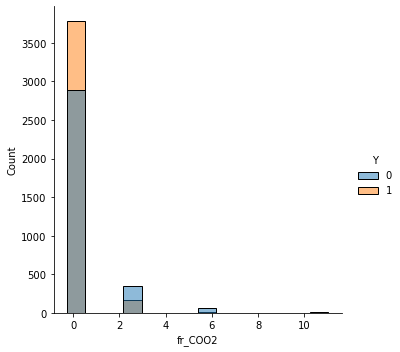

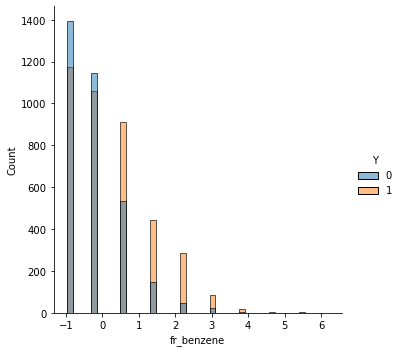

In [21]:
# Filtrar os dados por y=1 e y=0
df_y1 = df_global[df_global['Y']==1]
df_y0 = df_global[df_global['Y']==0]

# Criar o displot para fr_C002 em relação a Y
sns.displot(data=df_global, x='fr_COO2', hue='Y', kde=False)

# Criar o displot para fr_benzene em relação a Y
sns.displot(data=df_global, x='fr_benzene', hue='Y', kde=False)



O resultado obtido vai de encontro ao que era esperado no sentido em que : a maior média associada a uma capacidade mutagénica presente (y=1) teria de ser a menor média quando se estivesse a observar a coluna y=0 e vice-versa. Sendo assim as duas colunas que achamos mais relevantes estudar no grupo "fr_" seriam fr_benzene (associada a y=1) e fr_COO2(associada a y=0).

Além disso, os resultados obtidos vão de acordo ao descrito na literatura, onde o benzeno é conhecido por ser um composto químico altamente cancerígeno e mutagénico. A exposição prolongada ao benzeno pode causar danos no DNA e aumentar o risco de desenvolver cancro. Portanto, o fr_benzene pode estar relacionado à capacidade mutagénica dos compostos no dataset ames. É importante ressaltar, no entanto, que a análise da relação entre fr_benzene e capacidade mutagênica poderia ser mais extensamente explorada considerando outros fatores, como a dosagem e a frequência de exposição ao benzeno. Relativamente ao COO2, um ester carboxílico,na literatura não foram encontrdas evidências científicas que indiquem que compostos com  COO2, por si só, esteja, diretamente relacionado com a capacidade mutagénica tal como verificado pelos resultados.

Relativamente aos gráficos criados, a barra cinza  indica a densidade de frequência que é compartilhada pelas duas categorias de y (y=0 e y=1) para o fr_ em questão. A parte colorida do gráfico indica a distribuição de fr_COO2 ou fr_benzene para cada categoria de y. Lembrando que os valores valores foram previamente normalizados, a forma mais direta de interpretar estes gráfico é , por exemplo, no gráfico fr_COO2 podemos ver que todos os valores associados a y=1 estão com fr_COO2  de 0, ou seja este tipo de molécula não está ligado à capacidade mutagénica. No gráfico do fr_benzene vemos que a maior parte dos valores >0  estão associados a y=1. 

É sabido que podem haver mais composto com, por exemplo, elevadas médias tal como o benzeno para a coluna y=1 e que também poderiam ser tidos em consideração, contudo para permitir filtrar um pouco a nossa análise apenas temos em consideração o fr_benzene e fr_COO2.



O segundo "grupo" a ser analisado foi o "SMR_VSA" que se refere às contribuições do descritor VSA (Volume-based Surface Area) para a pontuação SMR (Small Molecule Risk) de uma molécula. O descritor VSA é uma medida que descreve a distribuição da área superficial de uma molécula, e é comumente usado em estudos de QSAR (Quantitative Structure-Activity Relationship) para prever a atividade biológica de compostos químicos. EM suma, SMR_VSA é um descritor molecular que mede a distribuição da área superficial da molécula em diferentes regiões.




In [22]:
# Selecionando as colunas que começam com "SMR_VSA"
cols_SMR = df_global.filter(regex='^SMR_VSA').columns

# Aplicando a normalização apenas nessas colunas
scaler = StandardScaler()
df_global[cols_SMR] = scaler.fit_transform(df_global[cols_SMR])
df_global[cols_SMR]

,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9
10,-1.036122,-0.092389,-0.151487,2.507759,-0.439277,-0.742669,0.892621,-1.394378,0.0,-0.525029
999,-1.036122,-1.188383,-0.151487,-0.594015,-0.439277,0.429995,-0.746279,-1.394378,0.0,-0.525029
1003,-1.036122,-0.210007,-0.151487,-0.594015,-0.439277,-0.742669,-0.746279,0.896484,0.0,1.127048
1005,-1.036122,-1.188383,-0.151487,0.508951,-0.439277,0.109129,-0.074782,-0.002282,0.0,-0.525029
1006,-0.556493,-0.839079,-0.151487,-0.594015,-0.439277,-0.438454,-0.746279,0.154707,0.0,-0.525029
...,...,...,...,...,...,...,...,...,...,...
991,-1.036122,-0.839079,4.874680,-0.594015,-0.439277,-0.438454,-0.746279,-0.044570,0.0,-0.525029
993,-0.556493,-0.126579,-0.151487,-0.594015,-0.439277,-0.484314,-0.746279,0.154707,0.0,-0.525029
994,3.313985,-0.122808,-0.151487,-0.594015,-0.439277,0.335860,0.560637,0.605998,0.0,2.035962
997,-0.071560,0.565709,-0.151487,-0.594015,-0.439277,-0.742669,-0.324425,-1.394378,0.0,-0.525029


In [23]:
# Filtrar linhas com Y=0 e selecionar colunas que começam com "SMR_VSA"
df_filtered = df_global.loc[df_global['Y'] == 0].filter(regex='^SMR_VSA')

# Calcular a média das colunas e obter o nome da coluna com maior e menor média
col_max = df_filtered.mean().idxmax()
col_min = df_filtered.mean().idxmin()

print(f"Coluna com maior média: {col_max}")
print(f"Coluna com menor média: {col_min}")

Coluna com maior média: SMR_VSA5
Coluna com menor média: SMR_VSA7


In [24]:
# Filtrar linhas com Y=1 e selecionar colunas que começam com "SMR_VSA"
df_filtered = df_global.loc[df_global['Y'] == 1].filter(regex='^SMR_VSA')

# Calcular a média das colunas e obter o nome da coluna com maior e menor média
col_max = df_filtered.mean().idxmax()
col_min = df_filtered.mean().idxmin()

print(f"Coluna com maior média: {col_max}")
print(f"Coluna com menor média: {col_min}")

Coluna com maior média: SMR_VSA7
Coluna com menor média: SMR_VSA5


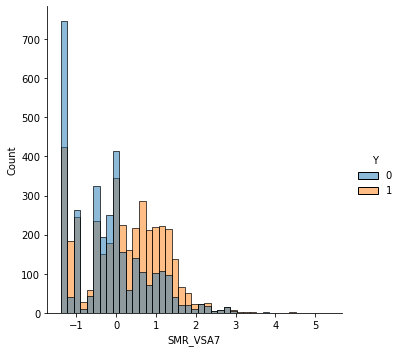

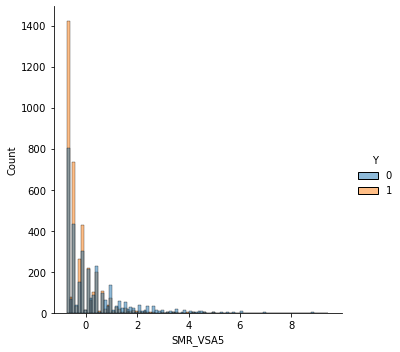

In [25]:
# Filtrar os dados por y=1 e y=0
df_y1 = df_global[df_global['Y']==1]
df_y0 = df_global[df_global['Y']==0]

# Criar o displot para fr_C002 em relação a Y
sns.displot(data=df_global, x='SMR_VSA7', hue='Y', kde=False)

# Criar o displot para fr_benzene em relação a Y
sns.displot(data=df_global, x='SMR_VSA5', hue='Y', kde=False)

As colunas SMR_VSA7 e SMR_VSA5 foram aquelas que obtiveram uma maior média quando associadas à coluna y=1 e y=0, respetivamente. Como já referido, SMR_VSA é um descritor molecular que mede a distribuição da área superficial da molécula em diferentes regiões. SMR_VSA5 e SMR_VSA7 são valores de SMR_VSA correspondentes às regiões 5 e 7 da molécula, respectivamente. A maior média de SMR_VSA7 em moléculas mutagênicas em comparação com SMR_VSA5 em moléculas não mutagênicas pode ser explicada por diferenças nas características estruturais das moléculas.

Moléculas mutagênicas geralmente têm uma estrutura mais complexa e incluem grupos funcionais que podem ser mais reativos e interagir com o DNA, resultando em danos no material genético. Esses grupos funcionais podem estar localizados em regiões específicas da molécula, como a região 7 (segundo os resultados). Assim, segundo os resultados podemos concluir que a região 7 das moléculas analisadas seria aquela que apresentaria uma estrutura mais complexa sendo por isso mais associdada a um potencial mutagénico.

Uma molécula com uma área superficial maior em uma determinada região pode ser mais propensa a interagir com o DNA e, portanto, pode ter uma maior capacidade mutagênica. No entanto, outros fatores, como a carga elétrica da molécula, sua polaridade e sua solubilidade em água, também podem influenciar sua interação com o DNA e, portanto, sua capacidade mutagênica.Portanto, embora uma pontuação SMR_VSA mais alta  numa determinada região ou regiões possa estar associada a uma maior capacidade mutagênica, essa relação é complexa e depende de vários outros fatores.

Através dos gráficos apresentados é possivel verificar, por exemplo no gráfico do SMR_VSA5, que realmente a coluna y=1 está associada a menores valores deste parâmetro levando a crer que esta região não está associada a capacidade mutagénica. Todavia, pela interpretação do gráfico relativo a SMR_VSA7 o output parace não clarificar tanto uma diferença entre a coluna y=0 e y=1.


Em conclusão, achamos que estes parametros do SMR_VSA por si só não são suficientes para criar uma associação direta entre os seus valores e capacidade mutagénica, mas juntamente com os restantes parametros podem ser uteis.

O terceito "grupo" a ser analisado goi o "SlogP_VSA", bastante utilizada para prever certas propriedades farmacocinéticas de uma molécula, se refere ao logaritmo do coeficiente de partição octanol-água ajustado para a forma molecular.O coeficiente de partição octanol-água é uma medida da solubilidade de uma molécula em água em comparação com a solubilidade em octanol (um solvente orgânico). A solubilidade é uma propriedade importante de uma molécula, pois pode influenciar sua absorção, distribuição, metabolismo e excreção no organismo, bem como sua interação com biomoléculas, como proteínas e DNA.



In [26]:
# Selecionando as colunas que começam com "SlogP"
cols_SlogP = df_global.filter(regex='^SlogP').columns

# Aplicando a normalização apenas nessas colunas
scaler = StandardScaler()
df_global[cols_SlogP] = scaler.fit_transform(df_global[cols_SlogP])
df_global[cols_SlogP]

,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9
10,2.675908,2.513085,-0.421256,-0.441593,-0.271546,-0.795797,-0.628698,-0.780329,-1.273520,-0.240166,-0.639963,0.0
999,-0.724149,-0.607150,-0.421256,-0.441593,-1.084027,-0.795797,-0.628698,0.463243,-1.273520,-0.240166,-0.639963,0.0
1003,-0.724149,-0.607150,-0.421256,0.775564,-1.084027,-0.795797,-0.628698,-0.780329,1.308981,-0.240166,0.303593,0.0
1005,0.326800,-0.607150,-0.421256,-0.441593,-0.372749,0.084091,-0.628698,-0.198492,0.052567,-0.240166,-0.639963,0.0
1006,-0.724149,0.387300,-0.421256,-0.441593,-0.816497,-0.795797,1.494343,-0.521102,-0.212651,-0.240166,-0.639963,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
991,-0.724149,0.387300,-0.421256,-0.441593,-1.084027,-0.795797,0.906021,-0.521102,-0.212651,-0.240166,-0.218003,0.0
993,-0.724149,0.387300,-0.421256,0.444798,-0.816497,0.009979,0.631605,-0.521102,-0.212651,-0.240166,-0.639963,0.0
994,0.212169,-0.607150,3.028650,-0.441593,2.295898,0.741119,-0.628698,1.805425,-0.477868,-0.240166,-0.639963,0.0
997,-0.724149,-0.607150,-0.421256,1.284504,-0.241580,-0.138770,-0.628698,-0.780329,-1.273520,-0.240166,-0.639963,0.0


In [27]:
# Filtrar linhas com Y=0 e selecionar colunas que começam com "SlogP"
df_filtered = df_global.loc[df_global['Y'] == 0].filter(regex='^SlogP')

# Calcular a média das colunas e obter o nome da coluna com maior e menor média
col_max = df_filtered.mean().idxmax()
col_min = df_filtered.mean().idxmin()

print(f"Coluna com maior média: {col_max}")
print(f"Coluna com menor média: {col_min}")

Coluna com maior média: SlogP_VSA5
Coluna com menor média: SlogP_VSA8


In [28]:
# Filtrar linhas com Y=1 e selecionar colunas que começam com "SlogP"
df_filtered = df_global.loc[df_global['Y'] == 1].filter(regex='^SlogP')

# Calcular a média das colunas e obter o nome da coluna com maior e menor média
col_max = df_filtered.mean().idxmax()
col_min = df_filtered.mean().idxmin()

print(f"Coluna com maior média: {col_max}")
print(f"Coluna com menor média: {col_min}")

Coluna com maior média: SlogP_VSA8
Coluna com menor média: SlogP_VSA5


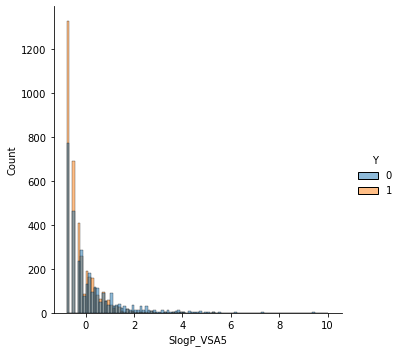

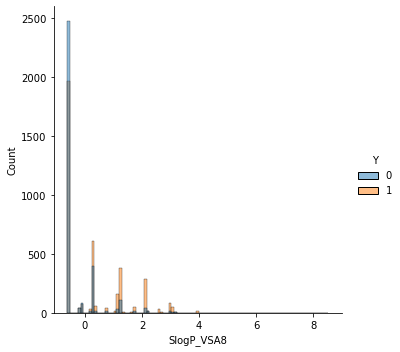

In [29]:
# Filtrar os dados por y=1 e y=0
df_y1 = df_global[df_global['Y']==1]
df_y0 = df_global[df_global['Y']==0]

# Criar o displot para fr_C002 em relação a Y
sns.displot(data=df_global, x='SlogP_VSA5', hue='Y', kde=False)

# Criar o displot para fr_benzene em relação a Y
sns.displot(data=df_global, x='SlogP_VSA8', hue='Y', kde=False)

O SlogP_VSA pode estar associado à capacidade mutagênica de uma molécula, pois pode influenciar sua absorção, distribuição, metabolismo e excreção no organismo, bem como sua interação com biomoléculas, como proteínas e DNA. Moléculas com alta exposição superficial e com valores elevados de SlogP_VSA podem ter uma maior tendência a se acumular em tecidos adiposos e a atravessar membranas biológicas, o que pode afetar a interação da molécula com o DNA e levar a danos genéticos e mutações. Por outro lado, moléculas com baixo SlogP tendem a ser mais hidrofílicas e podem ser eliminadas mais facilmente pelo organismo, diminuindo a exposição a possíveis efeitos mutagénicos.

Assim, segundo os resultados obtidos podemos concluir que a coluna SlogP_VSA8 ao ter maior valores pode estar associado a uma capacidade mutagénica, ao passo que a coluna SlogP_VSA5 como tem menor média não é expectavel que tenha associação a uma capacidade mutagénica. Segunda aa literatura esta diferença de valores deve estar associada com a região da droga analisada e com o tipo de átomos existentes sendo a região 5 uma zona com átomos de nitrogénios e oxigénios alifáticos e a região 8 com anéis aromáticos e heterocíclicos

Relativamente aos gráficos a interpretação vai de acordo ao referido na análise do primeiro e segundo grupos analisados, ou seja , a maior parte das drogas associada a y=0, sem capcidade mutagénica, têm valores ausentes na coluna SlogP_VSA8  e o as drogas com capacidade mutagénica têm valores mais elevados. No que concerne ao gráfico que representa a associação da capacidade mutagénica, y=0 ou y=1, e SlogP_VSA5 a interpretação é semelhante mas feita de maneira inversa ou a maior parte dos valores de SlogP_VSA5, associados a y=1, são baixos e os valores mais elevados estão associados a um y=0. 

Salientar que, assim como acontece com outros descritores moleculares, a relação entre SlogP_VSA e a capacidade mutagénica de uma molécula é complexa e depende de muitos outros fatores, como a presença de grupos funcionais reativos e a estrutura tridimensional da molécula. Portanto, a análise de dados de SlogP_VSA por si só não é suficiente para determinar se uma molécula é mutagênica ou não.

De seguida, decidimos explorar o MinAbsEStateIndex e MaxAbsEStateIndex que são descritores moleculares que medem a polaridade e a eletronegatividade de uma molécula.

O MinAbsEStateIndex é o valor absoluto do menor valor de índice de estado de elétrons (EState) na molécula, enquanto o MaxAbsEStateIndex é o valor absoluto do maior valor de índice de estado de elétrons na molécula. O EState é uma medida de eletronegatividade que atribui valores numéricos aos átomos em uma molécula com base em sua capacidade de atrair elétrons em uma ligação covalente.

Em termos gerais, quanto maior o valor de MinAbsEStateIndex ou MaxAbsEStateIndex, maior a polaridade e a eletronegatividade da molécula, o que pode estar associado a uma maior capacidade mutagênica. Moléculas polares e eletronegativas têm maior probabilidade de interagir com moléculas biológicas, como proteínas e DNA, levando a danos genéticos e mutações. No entanto, é importante lembrar que o efeito de um descritor molecular específico na capacidade mutagênica pode ser influenciado por outros fatores, como a estrutura química geral da molécula e a dose.

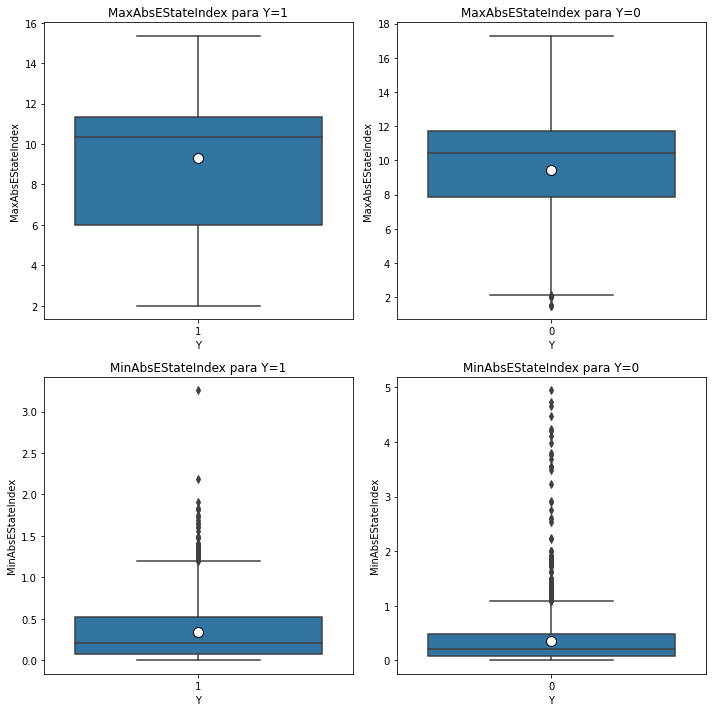

In [30]:
# criar os quatro dataframes para cada combinação de y e coluna
df_y1_maxabs = df_global[df_global['Y'] == 1][['Y', 'MaxAbsEStateIndex']]
df_y0_maxabs = df_global[df_global['Y'] == 0][['Y', 'MaxAbsEStateIndex']]
df_y1_minabs = df_global[df_global['Y'] == 1][['Y', 'MinAbsEStateIndex']]
df_y0_minabs = df_global[df_global['Y'] == 0][['Y', 'MinAbsEStateIndex']]

# criar a figura e os subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# plotar cada boxplot nos subplots correspondentes
sns.boxplot(x='Y', y='MaxAbsEStateIndex', data=df_y1_maxabs, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"}, ax=axs[0, 0])
axs[0, 0].set_title('MaxAbsEStateIndex para Y=1')

sns.boxplot(x='Y', y='MaxAbsEStateIndex', data=df_y0_maxabs, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"}, ax=axs[0, 1])
axs[0, 1].set_title('MaxAbsEStateIndex para Y=0')

sns.boxplot(x='Y', y='MinAbsEStateIndex', data=df_y1_minabs, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"}, ax=axs[1, 0])
axs[1, 0].set_title('MinAbsEStateIndex para Y=1')

sns.boxplot(x='Y', y='MinAbsEStateIndex', data=df_y0_minabs, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"}, ax=axs[1, 1])
axs[1, 1].set_title('MinAbsEStateIndex para Y=0')

# ajustar o espaçamento entre os subplots
plt.tight_layout()

# exibir o gráfico
plt.show()





In [31]:
df_global.loc[df_global['MaxAbsEStateIndex'].nlargest(5).index, ['MaxAbsEStateIndex', 'Y']]


,MaxAbsEStateIndex,Y
6175,17.286264,0
5396,16.859064,0
4765,15.351137,1
6756,15.351137,1
2471,15.192673,1


In [32]:
df_global.loc[df_global['MinAbsEStateIndex'].nlargest(5).index, ['MinAbsEStateIndex', 'Y']]


,MinAbsEStateIndex,Y
863,4.944445,0
3917,4.736111,0
6445,4.666666,0
4989,4.475013,0
5727,4.236111,0


Da análise dos boxplot criados, é de imediato posivel verificar que os resultados não vão de acordo ao que era expactavel, uma vez que, os valores mais elevados das colunas analisadas se encontram associados a um y=0. Este aspecto pode ser devido a interação de outros fatores no decorrer do precesso de análise, tais como a dose ou a própria estruturas químicas. Isto não siginica que os dados que temos estão errados, ou algo do genero, apenas vem salientar o que temos referido que associar a capcidade mutagénica a uma ou duas colunas por si só pode nao ser suficiente nem a estratégia mais correta.


Além disso, as médias representadas pela bola branca também parecem bastante semelhantes e na coluna MinAbsEStateIndex parece existir um conjunto de pontos outliers que também podem interferir negativamente com a visualização dos dados e respetivas conclusões

O QED (Quantitative Estimate of Drug-likeness) é um índice que mede a probabilidade de uma molécula ser um bom fármaco com base em sua estrutura química. O QED varia de 0 a 1, onde valores mais próximos de 1 indicam maior probabilidade de a molécula ser um bom fármaco. Desta forma, o nosso intuito foi explorar esta coluna e verificar se os dados obtidos vao de acordo ao expectável na medida em que se o qed tiver um valor muito elevado o farmaco é bom e portanto não terá capacidade mutagénica presente.

In [41]:
from scipy.stats import shapiro

stat, p_value = shapiro(df_global['qed'])

print(f'Statistics={stat:.4f}, p-value={p_value:.9f}')
if p_value > 0.05:
    print('A distribuição é normal')
else:
    print('A distribuição não é normal')


Statistics=0.9967, p-value=0.000000000
A distribuição não é normal


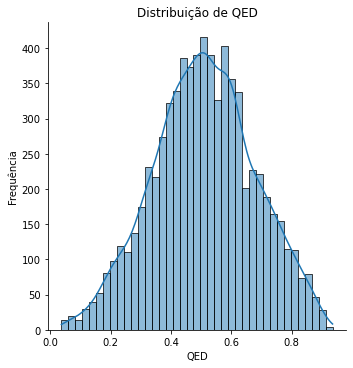

In [33]:
sns.displot(df_global, x='qed', kde=True)
plt.title('Distribuição de QED')
plt.xlabel('QED')
plt.ylabel('Frequência')
plt.show()

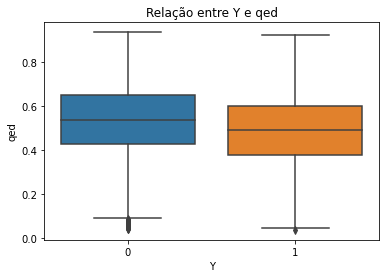

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# separar os dados por valor de Y
df_y1 = df_global[df_global['Y'] == 1]
df_y0 = df_global[df_global['Y'] == 0]

# criar o boxplot
sns.boxplot(x='Y', y='qed', data=df_global)
plt.title('Relação entre Y e qed')
plt.xlabel('Y')
plt.ylabel('qed')
plt.show()

Em relação à capacidade mutagênica, a literatura científica indica que compostos com maior QED tendem a ter menor capacidade mutagênica, já que eles são mais propensos a possuir perfis moleculares que são mais compatíveis com a interação com proteínas-alvo específicas e menos propensos a se ligarem aleatoriamente ao DNA, reduzindo assim o risco de danos ao material genético. Como é possivel verificar pela análise do boxplot a informação descrita na literatura não pode deveras ser observada.

No entanto, é importante lembrar que a capacidade mutag+enica também depende de outros fatores, como a presença de grupos funcionais específicos, tamanho da molécula e estrutura química geral, portanto, a relação entre QED e capacidade mutagênica não é determinística e precisa ser avaliada caso a caso.

Algo que nos dispertou interesse foi verificar como seria a distribuiçao dos peso molecuares exatos das moléculas em análise. E, posteriormente, verificar se poderia existir uma associação entre por exemplo moléculas com peso molecular elevado e sua determinada capacidade mutagénica.
O ExactMolWt é o peso molecular exato de uma molécula, ou seja, é a soma das massas atómicas de todos os átomos presentes na molécula, levando em consideração os isótopos naturais e suas abundâncias relativas. É uma medida importante para caracterizar a estrutura química de uma molécula e é frequentemente utilizada para avaliar a relação entre a estrutura molecular de um composto e suas propriedades físico-químicas e biológicas, como a capacidade mutagénica.


In [35]:
from scipy.stats import shapiro

stat, p_value = shapiro(df_global['ExactMolWt'])

print(f'Statistics={stat:.4f}, p-value={p_value:.4f}')
if p_value > 0.05:
    print('A distribuição é normal')
else:
    print('A distribuição não é normal')




Statistics=0.9301, p-value=0.0000
A distribuição não é normal


c:\Users\guilh\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


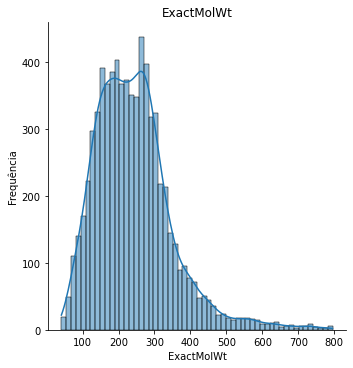

In [132]:
sns.displot(df_global, x='ExactMolWt', kde=True)
plt.title('ExactMolWt')
plt.xlabel('ExactMolWt')
plt.ylabel('Frequência')
plt.show()

Através do teste shapiro foi possivel observar que a distribuição dos dados associação ao ExactMolWt não é normal. Todavia, o nosso principal foco nesta fase de análise era associar a capacidade mutagénica de uma droga a um eventual range de peso molecular.

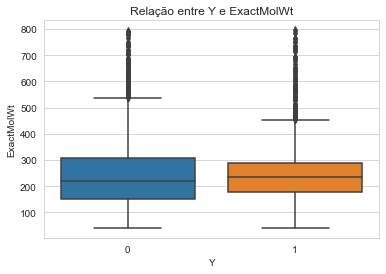

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# separar os dados por valor de Y
df_y1 = df_global[df_global['Y'] == 1]
df_y0 = df_global[df_global['Y'] == 0]

# criar o boxplot
sns.boxplot(x='Y', y='ExactMolWt', data=df_global)
plt.title('Relação entre Y e ExactMolWt')
plt.xlabel('Y')
plt.ylabel('ExactMolWt')
plt.show()


Pela análise do boxplot demonstrado acima, não parece em termos visuais que possamos associar um determinado range de peso molecular à capacidade mutagénica. Todavia a literatura, diz o contrário, mas também refere que a presença de determinados grupos químicos e suas interações têm um efeito mais preponderante na capacidade mutagénica.

In [50]:
df_global.iloc[:, 212]


IndexError: single positional indexer is out-of-bounds

In [52]:
from scipy.stats import shapiro

sig_level = 0.05  # nível de significância
normal_cols = []  # lista para armazenar as colunas com distribuição normal
non_normal_cols = []  # lista para armazenar as colunas com distribuição não normal

# Loop através das colunas e executar o teste de normalidade de Shapiro-Wilk
for col in df_global.iloc[:, 3:210]:
    stat, p_value = shapiro(df_global[col])
    
    # Verificar se o valor p é maior ou menor que o nível de significância
    if p_value > sig_level:
        normal_cols.append(col)
    else:
        non_normal_cols.append(col)

# Imprimir as colunas com distribuição normal e não normal
print(f'Colunas com distribuição normal: {normal_cols}')
print(f'Colunas com distribuição não normal: {non_normal_cols}')


Colunas com distribuição normal: ['SMR_VSA8', 'SlogP_VSA9', 'fr_prisulfonamd']
Colunas com distribuição não normal: ['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR

c:\Users\guilh\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
c:\Users\guilh\anaconda3\lib\site-packages\scipy\stats\morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [66]:
from scipy.stats import mannwhitneyu

# selecionar as colunas não-normais
non_normal_cols = [col for col in df_global.columns[3:211] if col not in normal_cols]

# criar um dicionário para armazenar os resultados dos testes Mann-Whitney
results = {}

# percorrer as colunas não-normais e calcular o teste de Mann-Whitney
for col in non_normal_cols:
    y0 = df_global.loc[df_global['Y'] == 0, col]
    y1 = df_global.loc[df_global['Y'] == 1, col]
    stat, p_value = mannwhitneyu(y0, y1, alternative='two-sided')
    results[col] = p_value

# classificar o dicionário com base nos valores de p-value
sorted_results = sorted(results.items(), key=lambda x: x[1])
print(sorted_results)

# selecionar as 30 primeiras colunas com os menores p-values
top30_cols = [col[0] for col in sorted_results[:10]]
top30_cols.insert(0, "Y")


# imprimir as 30 colunas selecionadas
print(top30_cols)




[('SlogP_VSA8', 1.0525420266464707e-133), ('fr_nitro', 5.218876650092251e-91), ('HallKierAlpha', 5.698375472638977e-91), ('NumAromaticRings', 1.1374805682231892e-90), ('SMR_VSA5', 2.113822892051272e-75), ('fr_benzene', 5.176000102261982e-75), ('NumAromaticCarbocycles', 6.741056973249058e-75), ('SMR_VSA7', 8.202725422310558e-69), ('RingCount', 2.108773157845818e-65), ('SlogP_VSA10', 3.499413533458884e-65), ('fr_nitro_arom_nonortho', 1.3612125803025288e-64), ('fr_nitro_arom', 7.905058308167507e-63), ('fr_NH0', 2.951590245271424e-61), ('fr_bicyclic', 8.377633994540488e-60), ('FractionCSP3', 3.553354269431986e-58), ('BertzCT', 1.501653091633677e-56), ('SMR_VSA10', 6.392302388734683e-54), ('SlogP_VSA5', 9.659282630468409e-54), ('Kappa3', 7.869880615253084e-52), ('VSA_EState6', 2.4578108419885353e-50), ('SlogP_VSA6', 2.5685823224424386e-50), ('VSA_EState8', 4.095917485980558e-41), ('NumSaturatedCarbocycles', 3.61441518067857e-37), ('fr_nitroso', 3.1865124545630994e-36), ('PEOE_VSA13', 1.3498

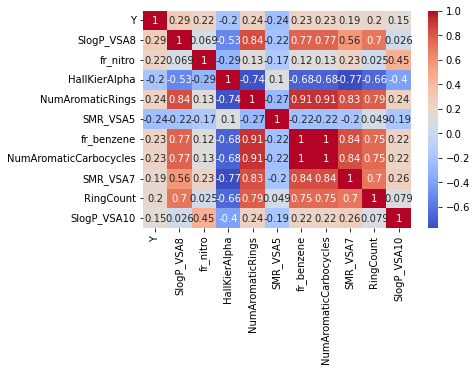

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_top_30 = df_global[top30_cols]

# Calcular a matriz de correlação
corr = df_top_30.corr()

# Plotar a matriz de correlação
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()


In [ ]:
from scipy.stats import ttest_ind


for col in normal_cols:
    # dividir os dados em duas amostras, com Y=0 e Y=1
    not_mutagenic = df_global[df_global['Y'] == 0][col]
    mutagenic = df_global[df_global['Y'] == 1][col]

    # calcular o p-valor do teste t de Student
    p_value = ttest_ind(not_mutagenic, mutagenic)[1]

    # imprimir o resultado
    print(f"A coluna {col} tem um p-valor de {p_value:.4f}")

In [114]:
from scipy.stats import ttest_ind
import seaborn as sns

# separar os dados em duas amostras (y=1 e y=0)
max_estate_y1 = df_global.loc[df_global['Y'] == 1, 'MaxEStateIndex']
max_estate_y0 = df_global.loc[df_global['Y'] == 0, 'MaxEStateIndex']

t_stat, p_value = ttest_ind(max_estate_y1, max_estate_y0)
print(f't-statistic: {t_stat:.4f}')
print(f'p-value: {p_value:.4f}')

t-statistic: -2.2548
p-value: 0.0242


## References:

[1] Xu, Congying, et al. “In silico prediction of chemical Ames mutagenicity.” Journal of chemical information and modeling 52.11 (2012): 2840-2847.